# 4.1.9 Practical activity: Create plots with Seaborn

# Import

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
movies = pd.read_csv('movies.csv')
ott = pd.read_excel('ott.xlsx')

# Validate

In [3]:
print(movies.shape)
print(movies.dtypes)
movies.head()

(16744, 11)
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
print(ott.shape)
print(ott.dtypes)
ott.head()

(16744, 5)
ID             int64
Netflix        int64
Hulu           int64
Prime Video    int64
Disney+        int64
dtype: object


,ID,Netflix,Hulu,Prime Video,Disney+
0,1,0,0,1,0
1,2,0,1,0,0
2,3,0,0,1,0
3,4,1,0,0,0
4,5,0,0,1,0


# Merge

In [5]:
mov_ott = pd.merge(movies, ott,
                   how = 'left', on = 'ID')

print(mov_ott.shape)
mov_ott.head()

(16744, 15)


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,0,1,0
1,2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,1,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,0,1,0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0


## Count Plot

<AxesSubplot:xlabel='Age', ylabel='count'>

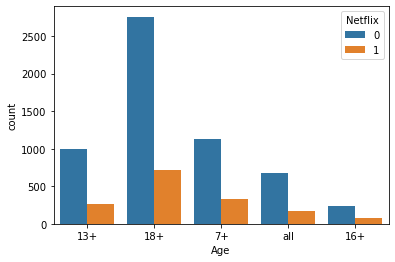

In [6]:
# Create a countplot based on number of movies streamed by Netflix per age group
sns.countplot(x = 'Age', hue = 'Netflix', data = mov_ott)

## Histogram

<AxesSubplot:xlabel='IMDb', ylabel='Count'>

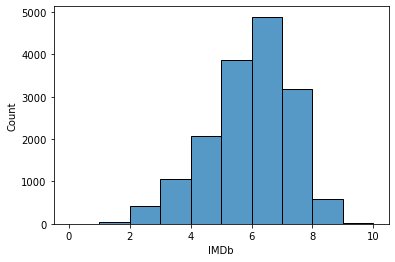

In [7]:
# Create a histogram based on IMDb
sns.histplot(data=mov_ott, x='IMDb', binwidth=1)

## scatterplot

<AxesSubplot:xlabel='IMDb', ylabel='Rotten Tomatoes'>

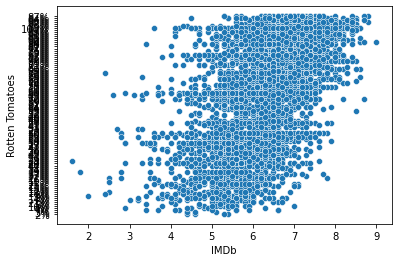

In [8]:
# Create a scatterplot with two variables (IMDb and Rotten Tomatoes)
sns.scatterplot(x = 'IMDb', y = 'Rotten Tomatoes', data = mov_ott)

# 4.1.12 Practical activity: Outlier analysis

<AxesSubplot:xlabel='Age', ylabel='IMDb'>

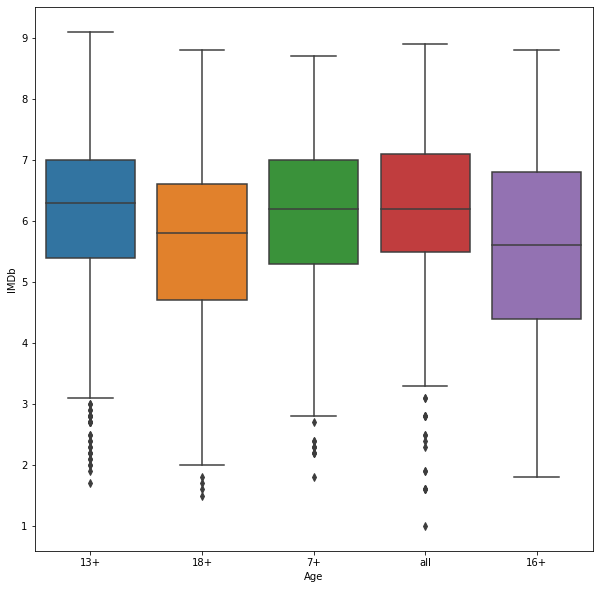

In [9]:
# Increase size of boxplot for clearer viewing
fig, ax = plt.subplots(1, figsize=(10, 10))

# Create boxplot with two variables (Age and IMDb)
sns.boxplot(data = mov_ott, x = 'Age', y = 'IMDb')

<AxesSubplot:xlabel='Age', ylabel='IMDb'>

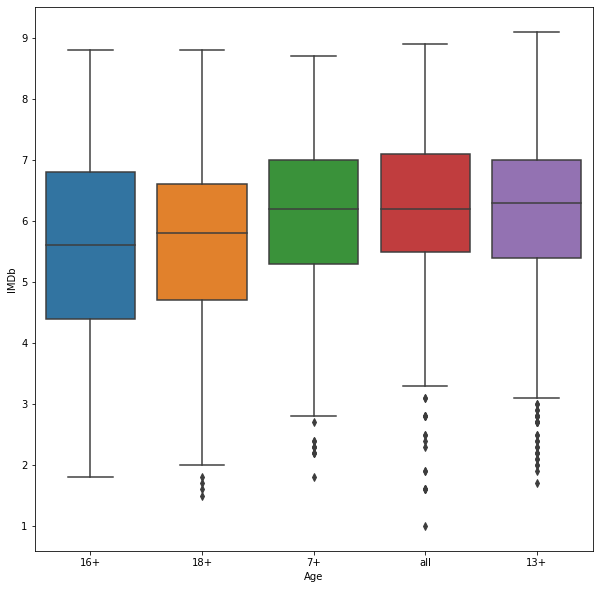

In [10]:
# Increase size of boxplot for clearer viewing
fig, ax = plt.subplots(1, figsize=(10, 10))

# Create order for grouping mov_ott by IMDb median
my_order = mov_ott.groupby(by = ['Age'])['IMDb'].median()\
           .sort_values().index

# Create boxplot using my_order
sns.boxplot(data = mov_ott, x = 'Age', y = 'IMDb', order = my_order)

# 4.1.15 Practical activity: Create line and subplots

### Plot a lineplot to identify possible trends by comparing the movies' release year and their IMDb ratings

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

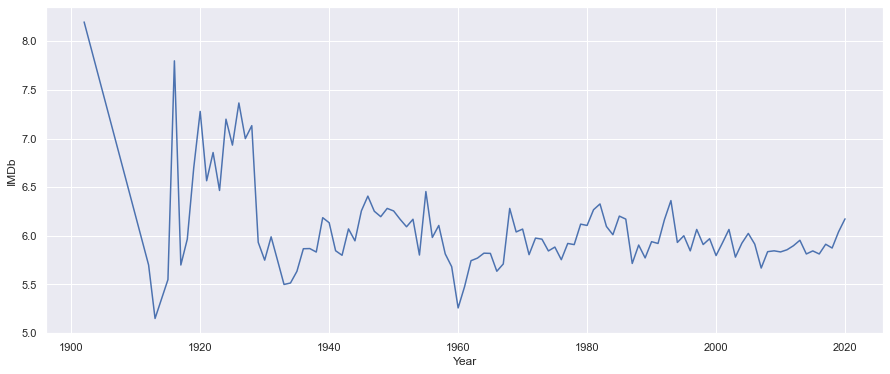

In [11]:
# Set the scale of the plot.
sns.set(font_scale = 1)

# Set the size of the plot.
plt.figure(figsize=(15, 6))

sns.lineplot(x = 'Year', y = 'IMDb', data = mov_ott,
             ci=None)

### Enhance the lineplot to include a comparison between the age, rating, and year of release of the movies.

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

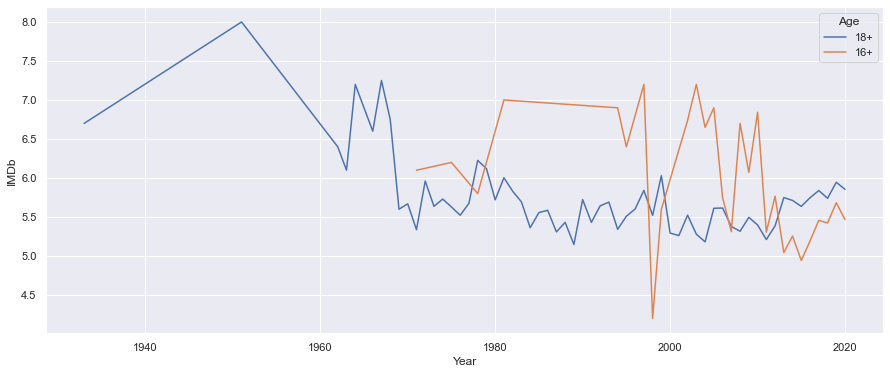

In [12]:
# Create plot size.
plt.figure(figsize=(15, 6))

# Specify data within particular age ratings using .isin([])
sns.lineplot(x = 'Year', y = 'IMDb',
             data = mov_ott[mov_ott['Age'].isin(['16+', '18+'])],
             hue ='Age', ci=None)

# 4.2.5 Practical activity: Customise your plots

### Use percentage (instead of count) to understand the data distribution, using the given code, followed by rotating the label by 90 degrees for better viewing

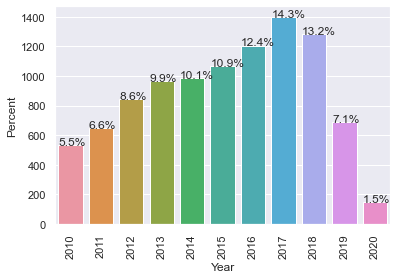

In [13]:
# Create a subset df
mov_ott_2010 = mov_ott[mov_ott['Year']>=2010]

# Create a countplot
ax = sns.countplot(x='Year', data=mov_ott_2010)

# Name y-axis
ax.set(ylabel='Percent')

total = len(mov_ott_2010['Year'])

# Create percentages
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

# Rotate x-axis labels
plt.xticks(rotation=90)

# View plot
plt.show()

### You would have already created a histogram for the rating column on IMDb
Add a line to the visualisation to see whether the data is normally distributed

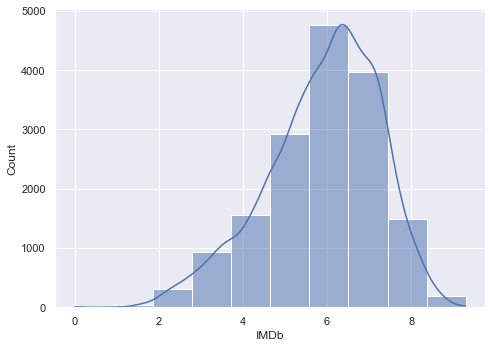

In [14]:
ax = sns.displot(data=mov_ott, x='IMDb', bins=10,kind='hist', 
                 palette='GnBu', aspect=1.4, kde=True)

plt.show()

# 4.2.7 Practical activity: Highlight and annotate your plots

You would have already created a scatterplot to identify the correlation between IMDb and Rotten Tomatoes ratings.

Add a new aspect called hue to show how the distribution of the movie is available on Netflix using the given code. What is your inference?

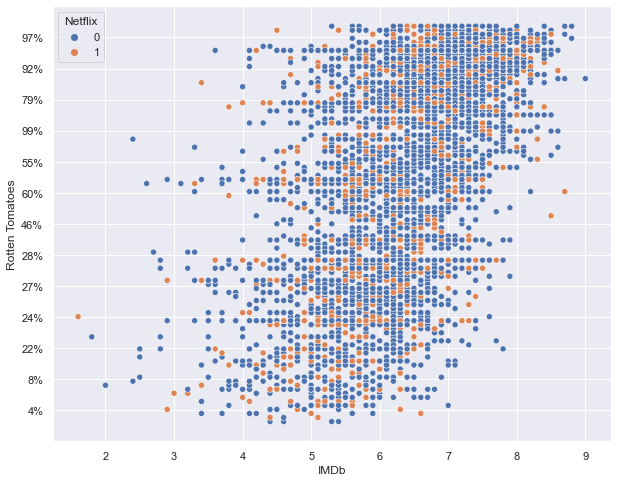

In [47]:
import matplotlib.ticker as ticker

# Create plot size.
plt.figure(figsize=(10, 8))

plot_ = sns.scatterplot(data=mov_ott, x='IMDb', y='Rotten Tomatoes', hue='Netflix')

plot_.yaxis.set_major_locator(ticker.LinearLocator(15))

You would have already created a boxplot from one of the previous activities for the rating column on IMDb.

Add a customisation for linewidth, hue, and palette. Using the given code will reveal more about the data. What is your inference?

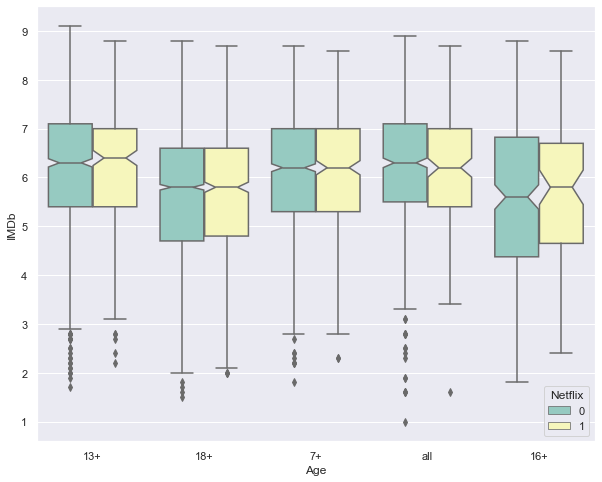

In [21]:
# Create plot size.
plt.figure(figsize=(10, 8))

sns.boxplot(data=mov_ott, x='Age', y='IMDb', linewidth=1.5, 
            notch=True, hue='Netflix', palette='Set3')

plt.show()

Repurpose your lineplot from one of the previous activities in which you plotted a line to display the trends comparing the movie release year and their IMDb ratings.

Customise the lineplot by changing the linewidth to zero in the given code.

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

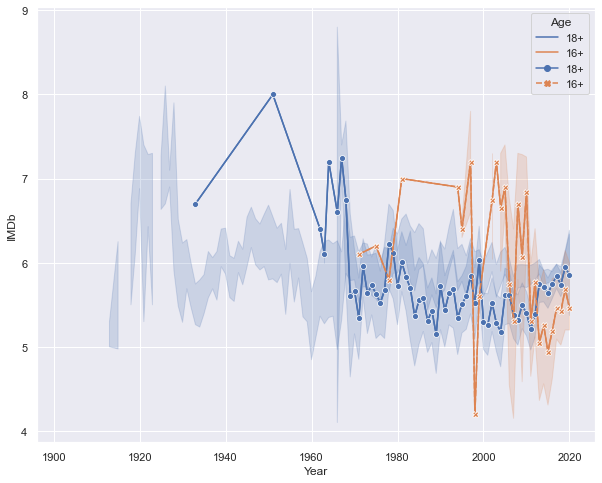

In [62]:
# Create plot size.
plt.figure(figsize=(10, 8))

sns.lineplot(x = 'Year', y = 'IMDb', data=mov_ott, linewidth=0)

sns.lineplot(x = 'Year', y = 'IMDb',
             data=mov_ott[mov_ott['Age'].isin(['16+', '18+'])], 
             hue ='Age')

sns.lineplot(x = 'Year', y = 'IMDb', 
             data=mov_ott[mov_ott['Age'].isin(['16+', '18+'])], 
             hue ='Age', style = 'Age', markers=True, ci=0)